# **Apple (AAPL) Stock Data: 1980 to December 2024**

**About Dataset**


This dataset contains the historical stock data for Apple Inc. (AAPL), sourced from Yahoo Finance, spanning from its initial public offering (IPO) on **December 12, 1980 through to December 2024.** The data includes daily stock prices and provides essential details such as:

Date: The specific trading date for each record.

Open: The opening price of Apple’s stock for that day.

High: The highest price reached by Apple’s stock on that day.

Low: The lowest price of Apple’s stock on that day.

Close: The closing price for Apple’s stock on that day.

Adj Close: The adjusted closing price which accounts for stock splits, dividends, and other corporate actions.

Volume: The number of shares traded on that particular day.

This dataset is essential for anyone looking to analyze Apple’s remarkable growth, from its early days in the personal computer industry to becoming the largest technology company in the world. It is perfect for time series analysis, stock price prediction, and financial modeling.

Source: The data has been sourced from Yahoo Finance, a widely trusted platform for obtaining historical financial and stock market data.

Data Usage:

Time Series Analysis: Analyze Apple’s stock price trends over decades of growth.
Stock Price Prediction: Build models to predict future movements in Apple’s stock price.
Financial Analysis: Perform detailed financial analysis of Apple’s stock performance, volatility, and market behavior.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Apple (AAPL) From 1980 To Dec-2024.csv",header=0)
df.head()

,Date,Open,High,Low,Close,Volume
0,1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600
1,1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800
2,1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000
3,1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600
4,1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
df.shape

(11084, 6)

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


  0 which represnt there is no null values.

In [ ]:


# Rename the first column to Date
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)


In [ ]:
X = df.drop("Close", axis=1)
y = df["Close"]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.predict(x_test)

array([23.34055253, 23.34055253, 23.34055253, ..., 23.34055253,
       23.34055253, 23.34055253])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=101)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=101)

In [ ]:
rf.predict(x_test)

array([23.34791747, 23.34791747, 23.34791747, ..., 23.34791747,
       23.34791747, 23.34791747])

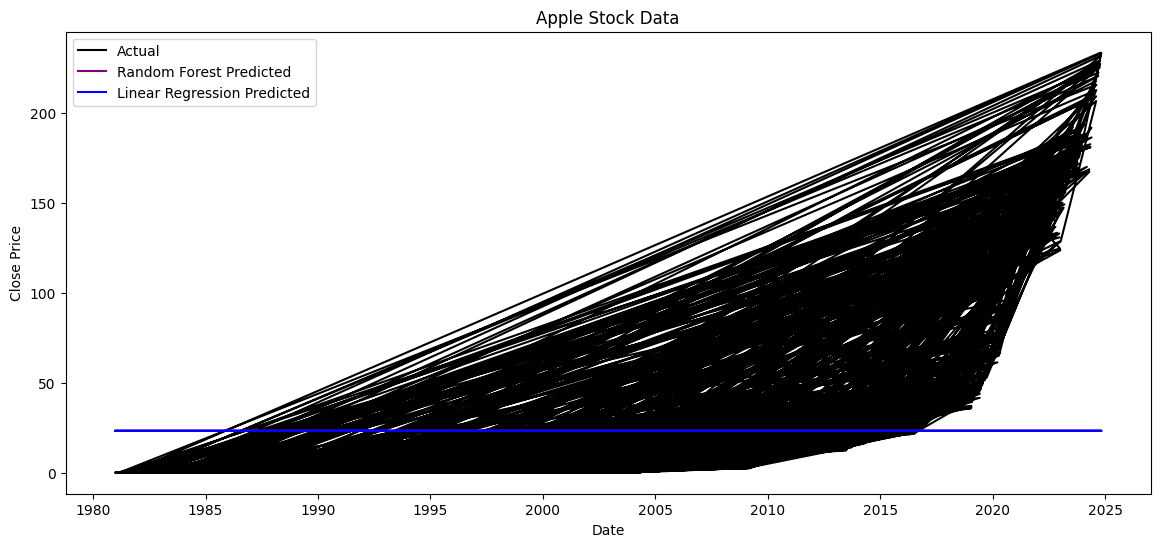

In [ ]:
import matplotlib.pyplot as plt

# Get predictions from the models
rf_predictions = rf.predict(x_test)
lr_predictions = lr.predict(x_test)

plt.figure(figsize=(14,6))
plt.plot(y_test.index,y_test,label="Actual",color="black")
plt.plot(y_test.index,rf_predictions,label="Random Forest Predicted",color="purple")
plt.plot(y_test.index,lr_predictions,label="Linear Regression Predicted",color="blue")

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Apple Stock Data")
plt.legend()
plt.show()

# Interpretation:

**Black line(Actual):**
This line represent the true historical closing price of apple stock.

**Blue line(Linear Regression):**
This line shows the prediction from linear regression model.Since the linear regression model is only using the ordinal date as a feature, this line will likely to be a straight line.  It doesn't capture the significant ups and downs of the actual stock price.


**Red line(Random Forest):**
This line shows the presiction from the Random forest model.

The graph clearly shows that both the Linear Regression and Random Forest models, when trained with only the ordinal date as a feature, are not effective in predicting the Apple stock closing prices.Their predicted lines are far from the actual price movements.






In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("Linear Regression")
print("MSE:", mean_squared_error(y_test, lr_predictions))
print("R2 score:", r2_score(y_test, lr_predictions))

Linear Regression
MSE: 2133.7934869143633
R2 score: -0.0009583322202291189


In [ ]:
print("Random Forest")
print("MSE:", mean_squared_error(y_test, rf_predictions))
print("R2 score:", r2_score(y_test, rf_predictions))

Random Forest
MSE: 2133.8145947049593
R2 score: -0.000968233843325006
